In [18]:
# Change encoding
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

# Hide warnings
#import warnings
#warnings.filterwarnings('ignore')

# Display dataframes as tables
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [19]:
from math import floor, ceil
import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_float,img_as_int
from skimage.io import imread, imshow
from skimage.util import view_as_blocks, view_as_windows
from skimage.filters import rank, sobel_h, sobel_v
from skimage.morphology import square, disk

In [20]:
def crop(im, bs):
    row_offset_before = floor((im.shape[0] % bs) / 2)
    row_offset_after  = ceil((im.shape[0] % bs) / 2)
    col_offset_before = floor((im.shape[1] % bs) / 2)
    col_offset_after  = ceil((im.shape[1] % bs) / 2)
    return im[row_offset_before : (im.shape[0] - row_offset_after), col_offset_before : (im.shape[1]-col_offset_after)].copy()

In [21]:
def blockproc(im, bs, fun, overlap=False):
    out = crop(im, bs)
    
    if (overlap):
        b = view_as_windows(out, (bs, bs)).copy()
    else:
        b = view_as_blocks(out, (bs, bs))
        
    for i in range(b.shape[0]):
        for j in range(b.shape[1]):
            if (overlap):
                out[i+floor(bs/2),j+floor(bs/2)] = fun(b[i,j])
            else:
                b[i,j] = fun(b[i,j])

    return out

In [22]:
def get_ri(bs):
    se = disk(floor(bs/2))
    ri = np.array([[True if (i <= bs/2) and ((j < i) or (j >= bs-i)) else False for j in range(bs)] for i in range(bs)])
    return (np.logical_and(se, ri))

def get_rii(bs):
    se = disk(floor(bs/2))
    rii = np.array([[True if ((j >= i) and (j < bs-i)) else False for j in range(bs)] for i in range(bs)])
    return (np.logical_and(se, rii))

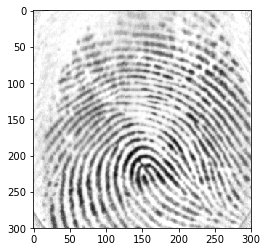

In [23]:
W = 20

I = img_as_float(imread('1_1.tif'))
plt.imshow(I, cmap='gray')
plt.show()

In [24]:
Vx = blockproc(I, W, lambda b : np.sum(2 * sobel_v(b) * sobel_h(b)))
Vy = blockproc(I, W, lambda b : np.sum(sobel_v(b) ** 2 - sobel_h(b) ** 2))

In [25]:
O  = 1/2 * np.arctan2(Vy,Vx)

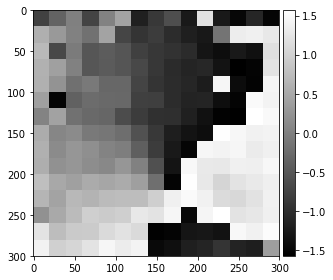

In [26]:
imshow(O, cmap='gray')
plt.show()

In [27]:
Fx  = np.cos(2 * O)
Fy  = np.sin(2 * O)
se = square(5)
Fxx = blockproc(Fx, W, lambda b: np.mean(b), True)
Fyy = blockproc(Fy, W, lambda b: np.mean(b), True)

In [28]:
Oo  = img_as_float(1 / 2 * np.arctan2(Fyy, Fxx));

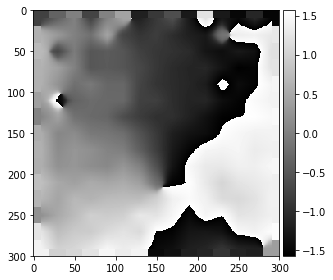

In [29]:
imshow(Oo, cmap='gray')
plt.show()

-0.999999999048
0.999999999799


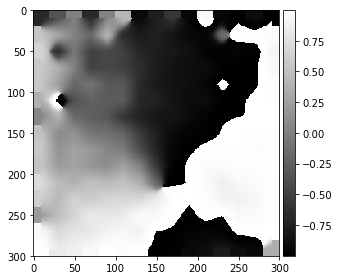

In [30]:
E = np.sin(Oo)
imshow(E, cmap='gray')
print(E.min())
print(E.max())
plt.show()

In [31]:
ri = get_ri(15)
rii = get_rii(15)

ei = blockproc(E, 15, lambda b: np.sum(np.multiply(ri,b)), True)
eii = blockproc(E, 15, lambda b: np.sum(np.multiply(rii,b)), True)
A = ei-eii

-39.993330906


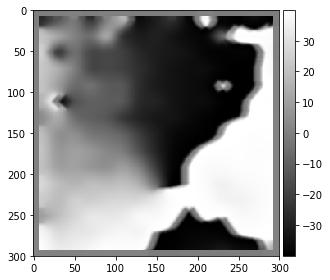

-41.997731759


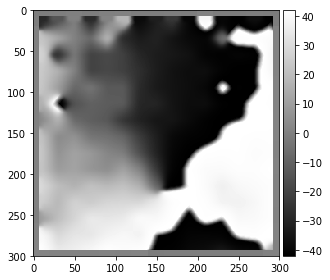

In [32]:
imshow(ei, cmap='gray')
print(ei.min())
plt.show()
imshow(eii, cmap='gray')
print(eii.min())
plt.show()

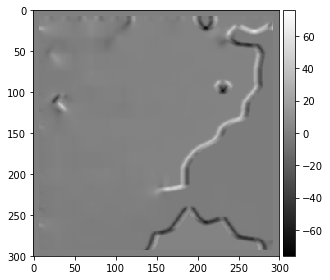

57.8043404776


In [33]:
imshow(A, cmap='gray')
plt.show()
print(A.max())

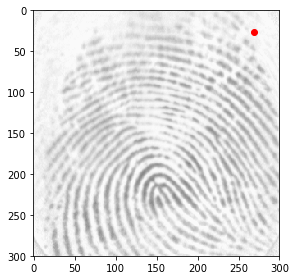

In [34]:
M = np.zeros(A.shape)
M[A == A.max()] = 1
yc, xc = M.nonzero()
imshow(I, cmap='gray')
plt.plot(xc, yc, 'ro')
plt.show()